In [1]:
from skimage.metrics import structural_similarity
import cv2
import imutils
from PIL import Image

In [2]:
rcard=Image.open('realcard.png')
fcard=Image.open('fakecard.png')

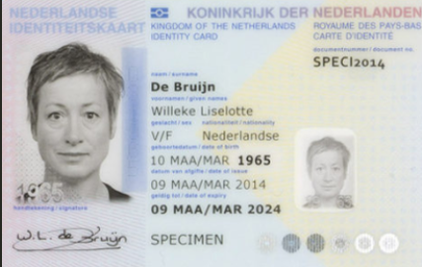

In [3]:
rcard

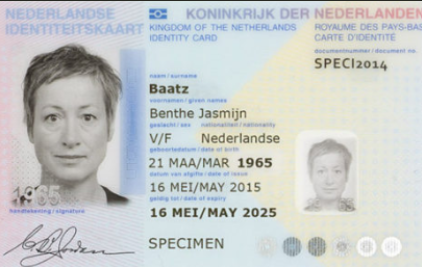

In [4]:
fcard

In [5]:
print(f"Format1-{rcard.format}")
print(f"Format2-{fcard.format}")

Format1-PNG
Format2-PNG


In [6]:
print(f"Size1-{rcard.size}")
print(f"Size2-{fcard.size}")

Size1-(422, 267)
Size2-(422, 267)


In [7]:
rcard = rcard.resize(fcard.size, resample=Image.LANCZOS)

In [8]:
print(f"Size1-{rcard.size}")
print(f"Size2-{fcard.size}")

Size1-(422, 267)
Size2-(422, 267)


In [9]:
rcard.save('realcard.png')

In [10]:
rcard=cv2.imread('realcard.png')
fcard=cv2.imread('fakecard.png')

In [11]:
r_gray=cv2.cvtColor(rcard,cv2.COLOR_BGR2GRAY) #cvtcolor->convertocolor
f_gray=cv2.cvtColor(fcard,cv2.COLOR_BGR2GRAY)

In [12]:
r_gray

array([[ 38,  42, 211, ..., 223, 226, 226],
       [ 38,  42, 215, ..., 224, 224, 226],
       [ 38,  42, 213, ..., 223, 224, 224],
       ...,
       [ 38,  42, 215, ..., 229, 229, 227],
       [ 38,  42, 207, ..., 227, 227, 226],
       [ 38,  42, 211, ..., 226, 226, 226]], dtype=uint8)

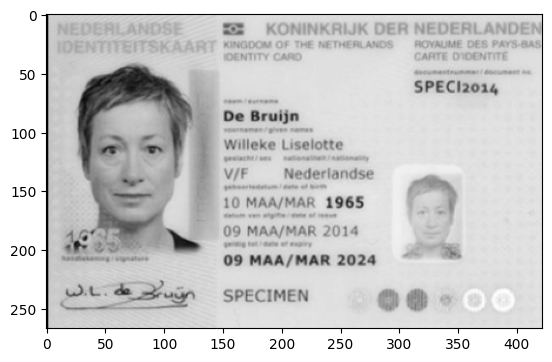

In [13]:
from matplotlib import pyplot as plt
plt.imshow(r_gray, cmap='gray')

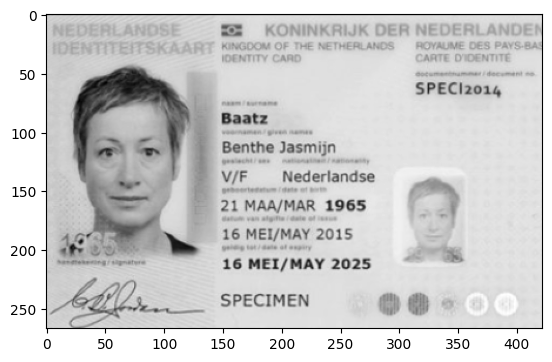

In [14]:
plt.imshow(f_gray, cmap='gray')

In [15]:
(score,diff)=structural_similarity(r_gray,f_gray,full=True)
diff=(diff*255).astype('uint8')
print('SSIM-',score)

SSIM- 0.5993945131172314


In [ ]:
#SSIM- 0.59 can be considered low similarity and fake card

In [16]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
#The threshold image is converted to a binary image,where different regions appear in inverted colors (white and black reversed).
#The variable `cnts` contains the list of contours found in the image.
#These contours are used to find the different areas between the fake card and the real card.

In [17]:
import numpy as np
real_np = np.array(r_gray)
fake_np = np.array(f_gray)

In [18]:
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(real_np, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(fake_np, (x, y), (x + w, y + h), (0, 0, 255), 2)

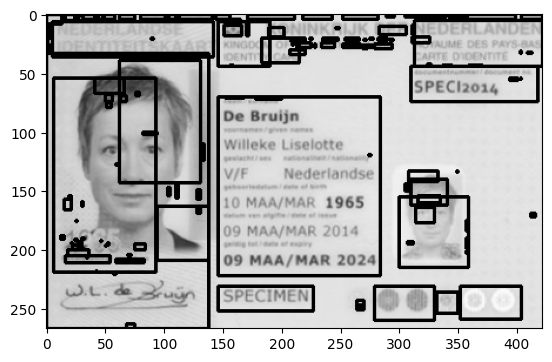

In [24]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(real_np, cv2.COLOR_BGR2RGB)) 


(-0.5, 421.5, 266.5, -0.5)

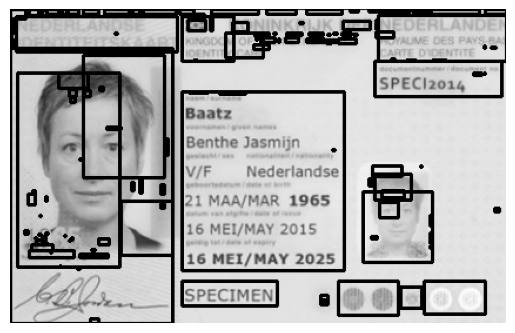

In [25]:
plt.imshow(cv2.cvtColor(fake_np, cv2.COLOR_BGR2RGB)) 
plt.axis('off') 

Different Image


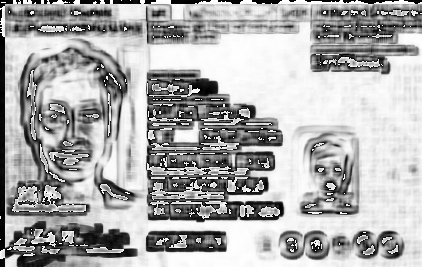

In [26]:
print('Different Image')
Image.fromarray(diff)

Threshold Image


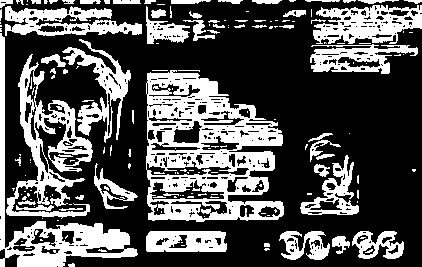

In [27]:
print('Threshold Image')
Image.fromarray(thresh)

In [ ]:
# diff: Shows the differences between two images in grayscale format.
#       Pixel values range from 0 to 255; the greater the difference, the brighter the pixel.

# thresh: Converts the diff image into a binary image.
#         Regions with differences are shown in white (255), and similar regions in black (0).
#         This helps to clearly identify and find contours around differing areas.